In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# x = horizontal axis
# y = vertical axis
# t = time (simulation step)

# rules for updating x and y
def update_x(x0, t):
    # x0 = starting x-coordinate
    # t = time
    return x0 + 2 * t

def update_y(y0, t):
    # y0 = starting y-coordinate
    # t = time
    return y0 - 4 * t

def plot_object_position(ax, x, y, c='b'):
    ax.scatter(x, y, s=75, c=c)
    return ax

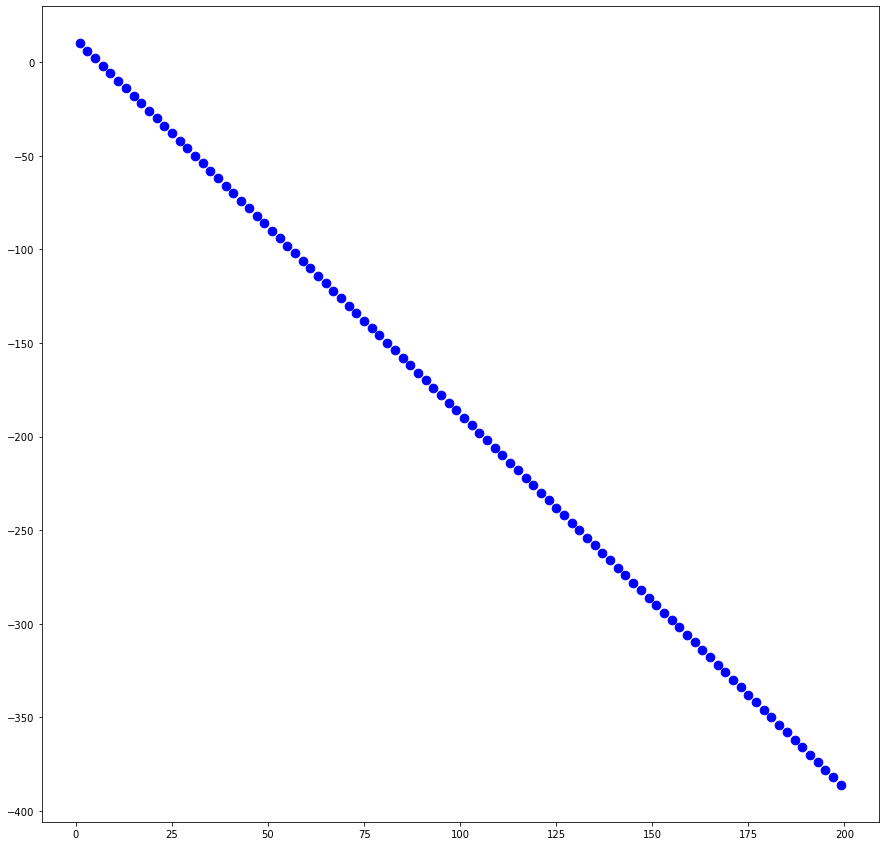

In [6]:
from time import sleep

x0 = 1
y0 = 10
steps = list(range(100))

position_x = []
position_y = []
for step in steps:
    x = update_x(x0, step)
    y = update_y(y0, step)
    position_x.append(x)
    position_y.append(y)


_, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(position_x, position_y, s=75, c='b')
plt.show()

In [16]:
def compute_trajectory(x0, y0, steps, fx, fy):
    position_x = []
    position_y = []
    for step in steps:
        x = fx(x0, step)
        y = fy(y0, step)
        position_x.append(x)
        position_y.append(y)
    return position_x, position_y

In [17]:
x0 = 100
y0 = 100
px, py = compute_trajectory(x0, y0, steps, update_x, update_y)

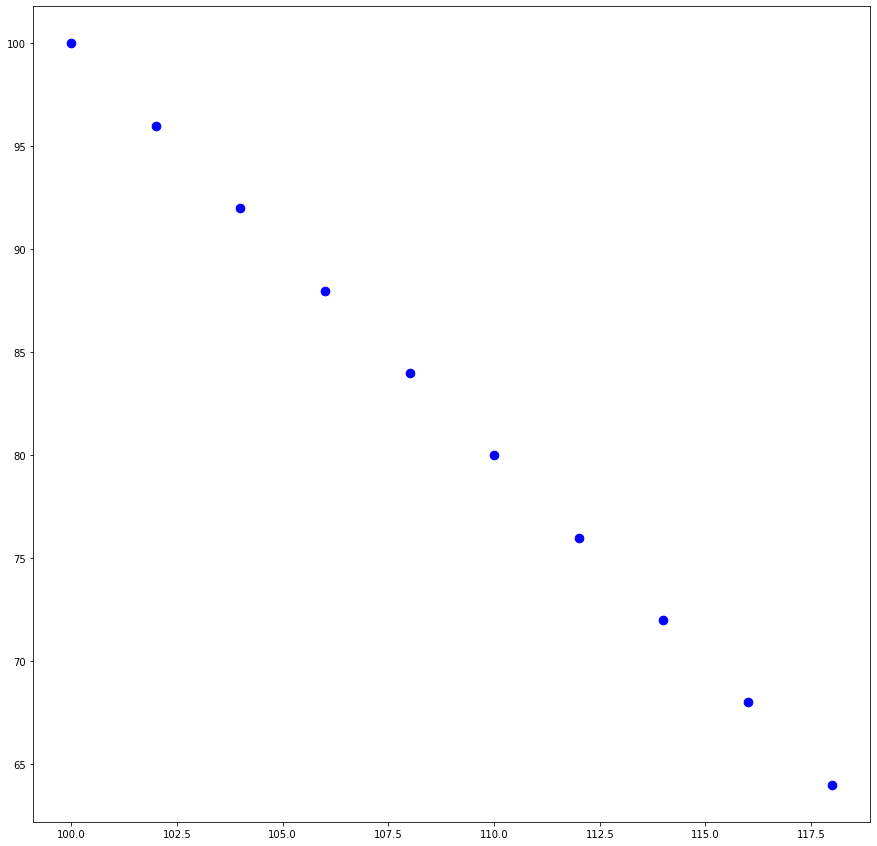

In [18]:
_, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(px, py, s=75, c='b')
plt.show()

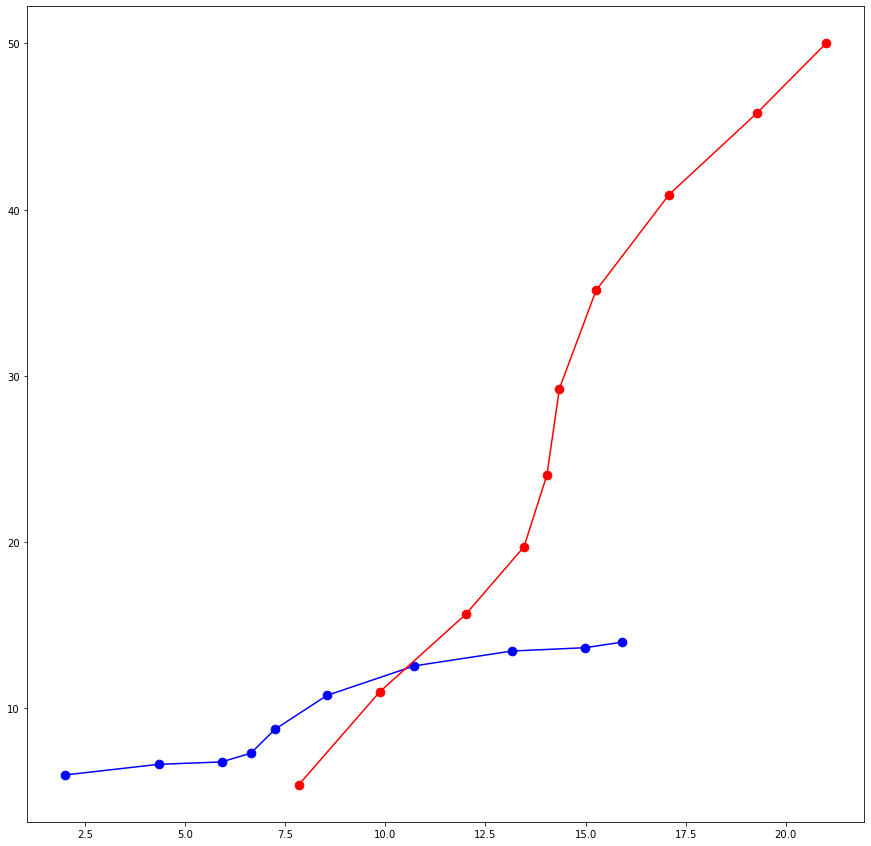

In [25]:
def update_obj1_x(x0, t):
    return x0 + 1.5*t + np.sin(t)

def update_obj1_y(y0, t):
    return y0 + 1.1*t + np.cos(t)

def update_obj2_x(x0, t):
    return x0 - 1.25*t + np.cos(t)

def update_obj2_y(y0, t):
    return y0 - 5*t + np.sin(t)

x10 = 2
y10 = 5
x20 = 20
y20 = 50
steps = list(range(10))

px1, py1 = compute_trajectory(x10, y10, steps, update_obj1_x, update_obj1_y)
px2, py2 = compute_trajectory(x20, y20, steps, update_obj2_x, update_obj2_y)

_, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(px1, py1, s=75, c='b')
ax.plot(px1, py1, c='b')
ax.scatter(px2, py2, s=75, c='r')
ax.plot(px2, py2, c='r')
plt.show()

In [22]:
# 5 + 1.1*t = 50 - 5*t
# 2 + 1.5*t = 20 - 1.25*t

# 1.1 * t + 5*t = 50 - 5
# 1.5 * t + 1.25 * t = 20 - 2

# 6.1*t = 55 => t = 55 / 6.1
# 2.75*t = 18 => t = 18 / 2.75

In [23]:
55/6.1, 18 / 2.75

(9.01639344262295, 6.545454545454546)

In [26]:
# 5 + 1.1*t + cos(t) = 50 - 5*t + sin(t)
# 2 + 1.5*t + sin(t) = 20 - 1.25*t + cos(t)

# 5 + 1.1*t + cos(t) - 50 + 5*t - sin(t) = 0 (eq1)
# 2 + 1.5*t + sin(t) - 20 + 1.25*t - cos(t) = 0 (eq2)

# -45 + 6.1t + cos(t) - sin(t) = 0 (eq1)
# -18 + 2.75t + sin(t) - cos(t) = 0 (eq2)

In [27]:
def eq1(t):
    return -45 + 6.1*t + np.cos(t) - np.sin(t)

def eq2(t):
    return -18 + 2.75*t + np.sin(t) - np.cos(t)

In [ ]:
# multi dimensional
def update_obj1_x(x0, t, ws):
    return x0 + 1.5*t - 0.24*ws

def update_obj1_y(y0, t, ws):
    return y0 + 1.1*t + 0.75*ws

def update_obj2_x(x0, t, ws):
    return x0 - 1.25*t + 1.1*ws

def update_obj2_y(y0, t, ws):
    return y0 - 5*t -1.2*ws